# Module 7: Generative AI Tools for Deriving Insights

# Lab Practice-7.1

**Topic:** Data Augmentation for a Manufacturing Company

**Problem Statement:** A manufacturing company wants to augment their small dataset to train better machine learning models. Use generative AI tools to create synthetic data, enhancing the original dataset for more robust model training.


**Step-by-Step Explanation**

1. Install Necessary Packages

        a)	SDV (Synthetic Data Vault): This package is used for generating synthetic data. The comment line installs the SDV package if it's not already installed.

2. Import Libraries

        a)	pandas: For data manipulation and analysis.
        b)	numpy: For numerical operations.
        c)	sdv.metadata.SingleTableMetadata: For defining metadata for a single table.
        d)	sdv.single_table.GaussianCopulaSynthesizer: For creating synthetic data using the Gaussian Copula model.
        e)	matplotlib.pyplot and seaborn: For data visualization.

3. Create Sample Dataset

        a)	Set seed: Ensure reproducibility of random numbers.
        b)	Create sample data: Generate a dictionary with:
          i.	product_id: Sequential product IDs.
          ii.	production_date: Dates ranging from January 1, 2023, onwards.
          iii.	shift: Randomly assigned shifts.
          iv.	temperature: Random temperatures between 15°C and 35°C.
          v.	pressure: Random pressures between 80 kPa and 120 kPa.
          vi.	humidity: Random humidity levels between 30% and 70%.
          vii.	defective: Random defect indicators, with a 90% chance of being non-defective and 10% chance of being defective.

4.	Convert to DataFrame

          a)	Create DataFrame: Convert the dictionary to a pandas DataFrame.

5.	Load Data into DataFrame

          a)	Print data: Display the first few rows of the original dataset.

6.	Define the Metadata

          a)	Define metadata: Create and detect metadata from the DataFrame to be used by the SDV package.

7.	Create Synthetic Data Using SDV

          a)	Initialize model: Use the Gaussian Copula synthesizer model with the defined metadata.
          b)	Fit model: Train the model on the original data.
          c)	Generate synthetic data: Create 900 rows of synthetic data.

8.	Display Synthetic Data

          a)	Print synthetic data: Display the first few rows of the synthetic dataset.

9.	Augment Original Dataset with Synthetic Data

          a)	Combine data: Concatenate the original and synthetic datasets.
          b)	Print augmented data: Display the first few rows of the combined dataset.

10.	Save Augmented Data to CSV

            a)	Save to CSV: Write the augmented DataFrame to a CSV file for future use.
11.	Visualizations

           a)	Distribution of Temperature
              1.	Histogram: Plot the distribution of temperatures in the augmented dataset.
            b)	Distribution of Pressure
              1.	Histogram: Plot the distribution of pressures in the augmented dataset.
            c)	Distribution of Humidity
              1.	Histogram: Plot the distribution of humidity levels in the augmented dataset.
            d)	Countplot of Shifts
              1.	Countplot: Display the count of each shift in the augmented dataset.
            e)	Countplot of Defective Products
              1.	sCountplot: Display the count of defective vs. non-defective products in the augmented dataset.

**step 1: Install Necessary Packages**

In [1]:
# Install the SDV package if not already installed
!pip install sdv

**step 2: import libraries**

In [2]:
import pandas as pd
import numpy as np
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
import matplotlib.pyplot as plt
import seaborn as sns

**Step 3: Create Sample Dataset**

In [3]:
np.random.seed(42)

# Create sample data
data = {
    'product_id': range(1, 101),
    'production_date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'shift': np.random.choice(['morning', 'afternoon', 'night'], 100),
    'temperature': np.random.uniform(15, 35, 100),
    'pressure': np.random.uniform(80, 120, 100),
    'humidity': np.random.uniform(30, 70, 100),
    'defective': np.random.choice([0, 1], 100, p=[0.9, 0.1])
}


**step 4: Convert to DataFrame**

In [4]:

df = pd.DataFrame(data)

**Step 5: Load Data into DataFrame**

In [5]:
print("Original Data:")
print(df.head())

# Define the metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

Original Data:
   product_id production_date    shift  temperature    pressure   humidity  \
0           1      2023-01-01    night    18.974314   80.663513  62.404536   
1           2      2023-01-02  morning    15.110442  100.483722  64.682893   
2           3      2023-01-03    night    31.309229   89.059831  66.529622   
3           4      2023-01-04    night    29.137147  105.806912  50.453696   
4           5      2023-01-05  morning    29.580143   86.974657  50.060652   

   defective  
0          0  
1          0  
2          0  
3          0  
4          0  


**Step 6: Use SDV to Create Synthetic Data**

In [6]:
# Initialize the GaussianCopula model
model = GaussianCopulaSynthesizer(metadata)

# Fit the model on the original data
model.fit(df)

# Generate synthetic data
synthetic_data = model.sample(900)  # Generate 900 synthetic rows to augment the original 100 rows

print("Synthetic Data:")
print(synthetic_data.head())

/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Synthetic Data:
   product_id production_date      shift  temperature    pressure   humidity  \
0   954872297      2023-03-14  afternoon    21.004154  115.687190  49.151896   
1   654333885      2023-02-09  afternoon    31.676039  109.351812  62.005954   
2   776607896      2023-03-29  afternoon    28.641738   97.391514  39.703090   
3   150369213      2023-01-23    morning    32.349694  107.791680  33.163619   
4   453830347      2023-04-08  afternoon    33.014998  110.570726  32.186216   

   defective  
0          0  
1          0  
2          0  
3          0  
4          0  


**Step 7: Augment Original Dataset with Synthetic Data**

In [7]:
# Concatenate the original and synthetic data
augmented_data = pd.concat([df, synthetic_data], ignore_index=True)

**step 8: Display the augmented dataset**

In [8]:
print("Augmented Data:")
print(augmented_data.head())

Augmented Data:
   product_id production_date    shift  temperature    pressure   humidity  \
0           1      2023-01-01    night    18.974314   80.663513  62.404536   
1           2      2023-01-02  morning    15.110442  100.483722  64.682893   
2           3      2023-01-03    night    31.309229   89.059831  66.529622   
3           4      2023-01-04    night    29.137147  105.806912  50.453696   
4           5      2023-01-05  morning    29.580143   86.974657  50.060652   

   defective  
0          0  
1          0  
2          0  
3          0  
4          0  


**step 9:Save the augmented data to CSV for further use**

In [9]:
augmented_data.to_csv('augmented_manufacturing_data.csv', index=False)

print("Data augmentation complete. Augmented dataset saved to CSV.")

Data augmentation complete. Augmented dataset saved to CSV.


**step 10: Visualizations**

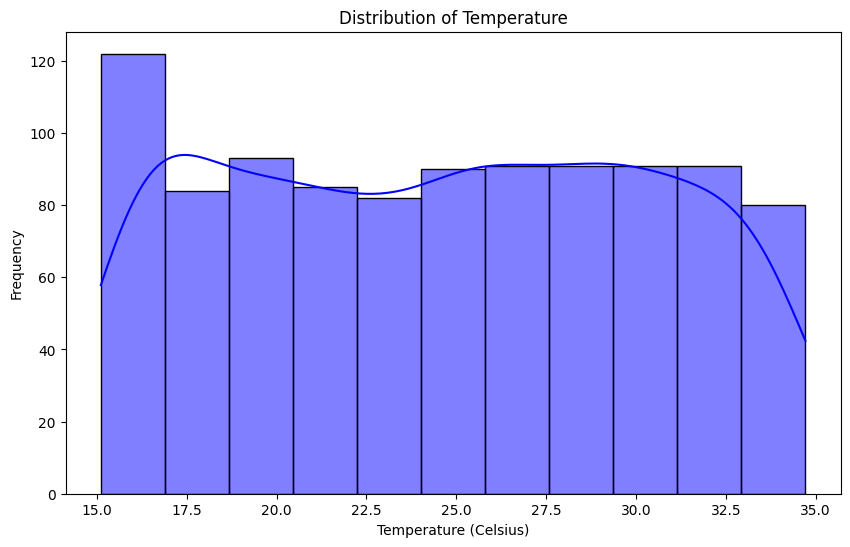

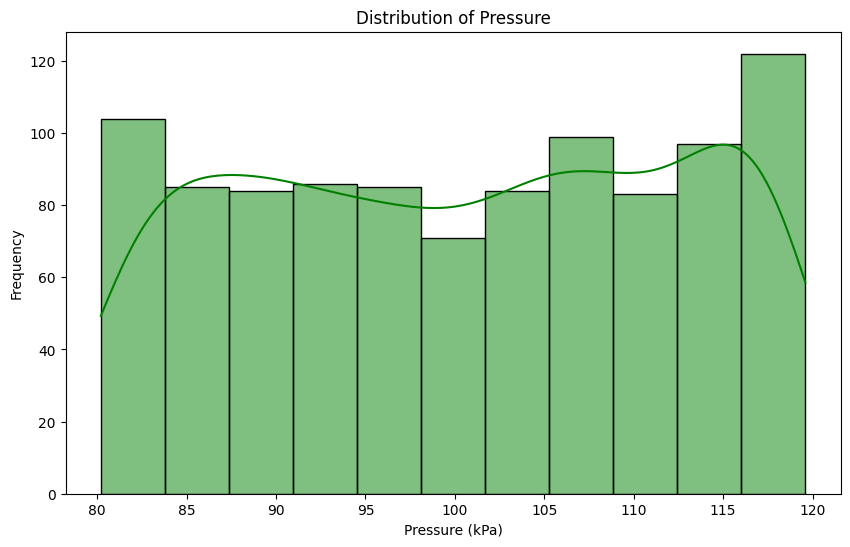

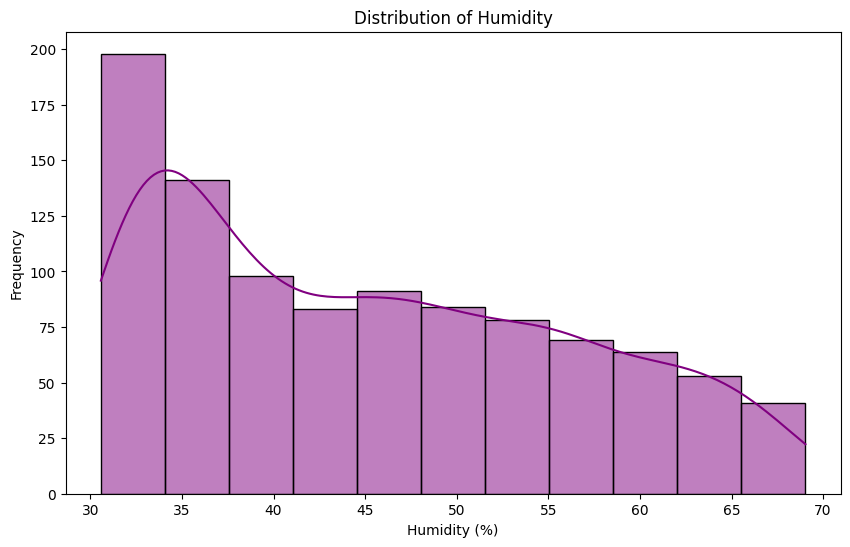

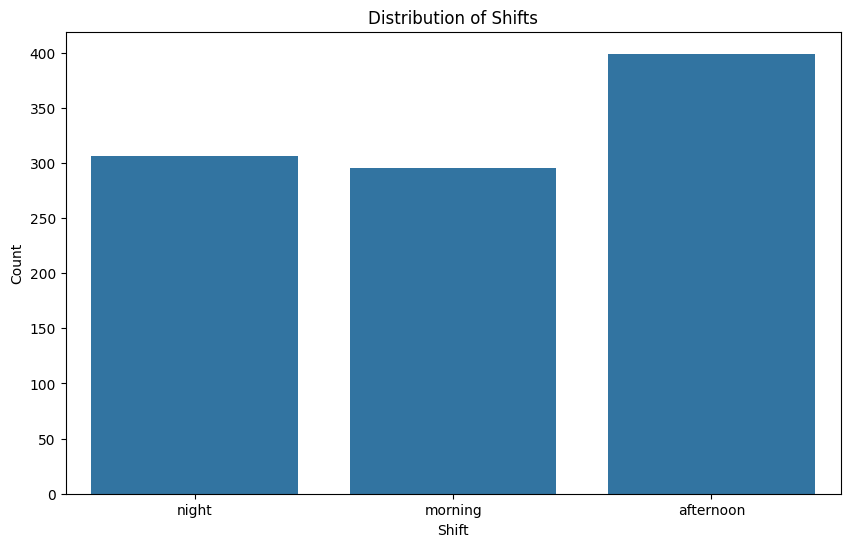

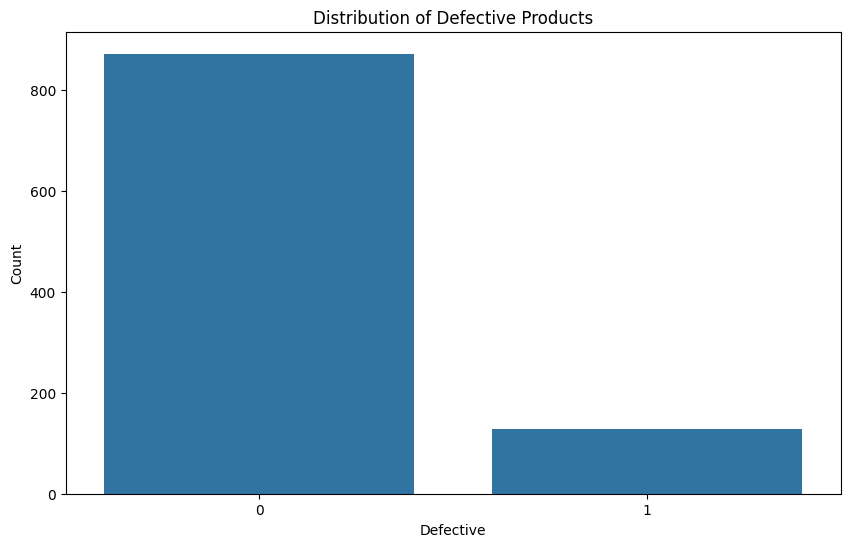

In [10]:
# Distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(augmented_data['temperature'], kde=True, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

# Distribution of pressure
plt.figure(figsize=(10, 6))
sns.histplot(augmented_data['pressure'], kde=True, color='green')
plt.title('Distribution of Pressure')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Frequency')
plt.show()

# Distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(augmented_data['humidity'], kde=True, color='purple')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

# Countplot of shifts
plt.figure(figsize=(10, 6))
sns.countplot(x='shift', data=augmented_data)
plt.title('Distribution of Shifts')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.show()

# Countplot of defective products
plt.figure(figsize=(10, 6))
sns.countplot(x='defective', data=augmented_data)
plt.title('Distribution of Defective Products')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()